In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
df = pd.read_csv('Customer.csv')
df.head(9)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3


In [44]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [45]:
from sklearn.preprocessing import MinMaxScaler
X = df.values[:,1:]
min_max_scaler = MinMaxScaler()
Clus_dataSet = min_max_scaler.fit_transform(X)
Clus_dataSet[0:5]


array([[1.        , 0.01923077, 0.        , 0.3877551 ],
       [1.        , 0.05769231, 0.        , 0.81632653],
       [0.        , 0.03846154, 0.00819672, 0.05102041],
       [0.        , 0.09615385, 0.00819672, 0.7755102 ],
       [0.        , 0.25      , 0.01639344, 0.39795918]])

## K Means -------------------------------------------------------------------------------------------------------------------

In [5]:
from sklearn.cluster import KMeans 

In [79]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(Clus_dataSet)
labels = k_means.labels_
print(labels)

[1 1 0 0 0 0 0 0 2 0 2 0 0 0 2 1 0 1 2 0 2 1 0 1 0 1 0 1 0 0 2 0 2 1 0 0 0
 0 0 0 0 1 2 0 0 0 0 0 0 0 0 1 0 2 0 2 0 2 0 2 2 1 0 0 2 1 0 0 1 0 2 0 0 0
 2 1 0 2 0 0 2 1 2 0 0 2 0 0 0 0 0 1 2 0 0 1 0 0 2 1 0 0 2 1 2 0 0 2 2 2 2
 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 2 1 2 1 2 1 0 0 2 0 0 1 2 0 0 1 0 0 2 1 2 0
 0 1 2 1 0 0 0 0 2 0 2 0 0 0 2 0 2 0 2 0 0 1 2 1 2 1 0 0 2 1 2 1 0 0 2 0 0
 1 0 1 0 0 0 0 2 0 0 0 0 1 2 1]


In [80]:
df['Clus_km'] = labels
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clus_km
0,1,1,19,15,39,1
1,2,1,21,15,81,1
2,3,0,20,16,6,0
3,4,0,23,16,77,0
4,5,0,31,17,40,0


In [81]:
df.groupby('Clus_km').mean()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
Clus_km,,,,,
0,97.562500,0.0,38.098214,59.250000,51.526786
1,103.375000,1.0,28.250000,62.000000,71.675000
2,104.958333,1.0,49.437500,62.416667,29.208333


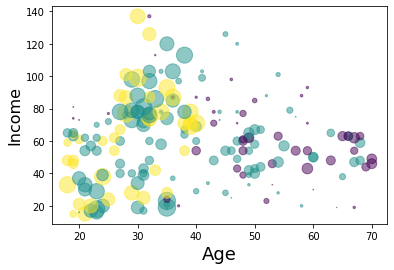

In [71]:
area = np.pi * (( X[:, 3])/10)**2  #
plt.scatter(X[:, 1], X[:, 2], s=area, c=labels.astype(np.float64), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)
plt.show()

C:\Users\Hanie\AppData\Local\Temp/ipykernel_6192/1836493832.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=25, azim=120)


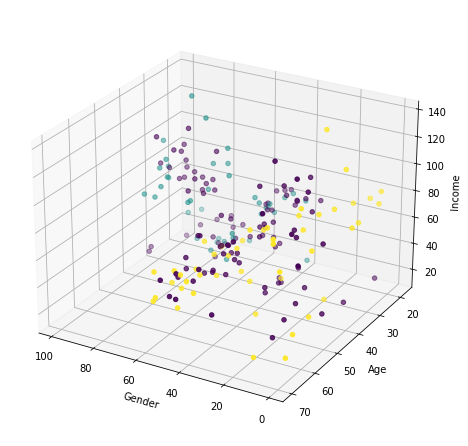

In [82]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=25, azim=120)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('Gender')
ax.set_ylabel('Age')
ax.set_zlabel('Income')
ax.scatter(X[:, 3], X[:, 1], X[:, 2], c= labels.astype(np.float64))

## Hierarchical --------------------------------------------------------------------------------------------------------------

In [49]:
from sklearn.metrics.pairwise import euclidean_distances
dist_matrix = euclidean_distances(Clus_dataSet,Clus_dataSet) 
print(dist_matrix)

[[0.         0.43029381 1.05538015 ... 1.00888686 1.0528145  1.11639204]
 [0.43029381 0.         1.25941672 ... 0.93683095 1.20748243 1.01507247]
 [1.05538015 1.25941672 0.         ... 1.53221213 1.43245312 1.62419301]
 ...
 [1.00888686 0.93683095 1.53221213 ... 0.         0.57849818 0.13432353]
 [1.0528145  1.20748243 1.43245312 ... 0.57849818 0.         0.66437953]
 [1.11639204 1.01507247 1.62419301 ... 0.13432353 0.66437953 0.        ]]


In [50]:
from scipy.cluster import hierarchy
Z = hierarchy.linkage(dist_matrix, 'complete')

C:\Users\Hanie\AppData\Local\Temp/ipykernel_4540/3409742170.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist_matrix, 'complete')


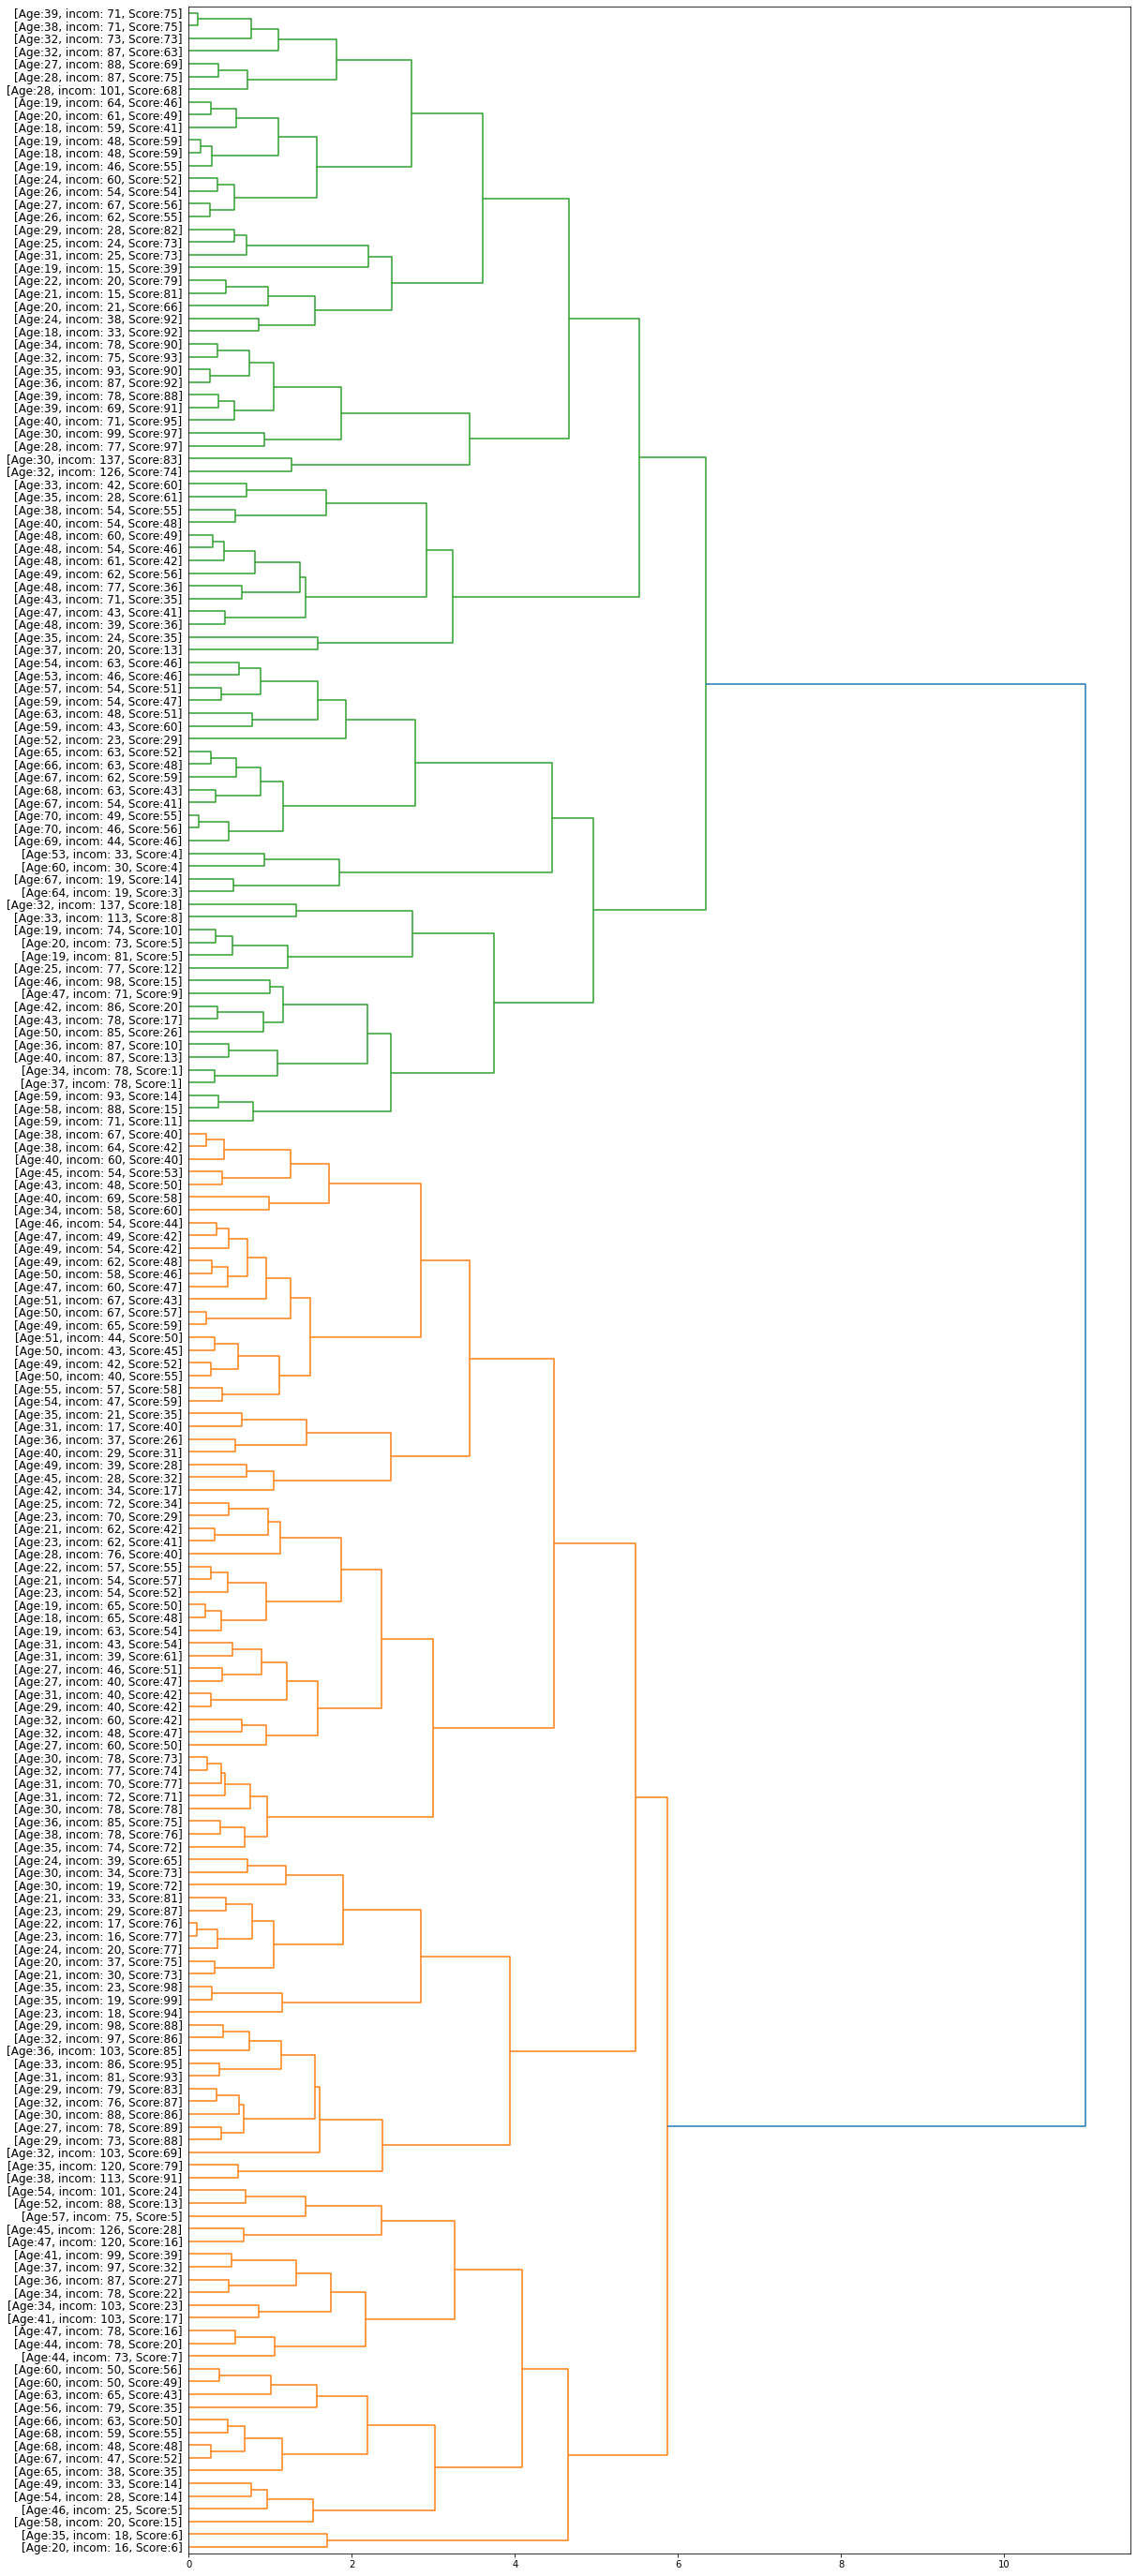

In [51]:
import pylab
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[Age:%s, incom: %s, Score:%s]' % (df['Age'][id], df['Annual Income (k$)'][id], df['Spending Score (1-100)'][id] )
    
dendro = hierarchy.dendrogram(Z,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

In [52]:
from sklearn.cluster import AgglomerativeClustering
agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'complete')
agglom.fit(dist_matrix)

agglom.labels_

C:\Users\Hanie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_agglomerative.py:542: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


array([1, 1, 3, 5, 2, 5, 3, 5, 0, 5, 0, 5, 3, 5, 4, 1, 2, 1, 0, 5, 4, 1,
       3, 1, 3, 1, 2, 4, 2, 5, 0, 5, 0, 1, 3, 5, 2, 5, 2, 5, 3, 1, 4, 2,
       2, 5, 2, 2, 2, 2, 2, 4, 2, 0, 2, 4, 2, 0, 2, 0, 0, 1, 3, 2, 0, 1,
       2, 3, 1, 2, 0, 2, 3, 3, 0, 1, 2, 4, 2, 2, 0, 4, 0, 2, 2, 4, 2, 2,
       2, 2, 3, 1, 4, 2, 2, 1, 2, 2, 4, 1, 2, 2, 0, 1, 4, 2, 3, 0, 0, 0,
       0, 2, 2, 1, 2, 2, 3, 2, 2, 2, 1, 2, 2, 1, 2, 2, 4, 1, 0, 1, 0, 1,
       2, 2, 0, 5, 3, 1, 0, 2, 3, 1, 2, 5, 0, 1, 4, 2, 3, 1, 0, 1, 3, 2,
       3, 5, 0, 2, 0, 2, 3, 5, 0, 5, 0, 2, 0, 5, 3, 1, 0, 1, 0, 1, 3, 5,
       0, 1, 0, 1, 3, 5, 0, 5, 3, 1, 3, 1, 3, 5, 3, 5, 0, 5, 3, 5, 3, 1,
       0, 1], dtype=int64)

In [53]:
df['cluster_'] = agglom.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Annual_Income,cluster_
0,1,1,19,15,39,15,1
1,2,1,21,15,81,15,1
2,3,0,20,16,6,16,3
3,4,0,23,16,77,16,5
4,5,0,31,17,40,17,2


In [62]:
df['Annual_Income'] = df['Annual Income (k$)']
df['Spending_Score'] = df['Spending Score (1-100)']
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Annual_Income,cluster_,Spending_Score
0,1,1,19,15,39,15,1,39
1,2,1,21,15,81,15,1,81
2,3,0,20,16,6,16,3,6
3,4,0,23,16,77,16,5,77
4,5,0,31,17,40,17,2,40


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

Text(0, 0.5, 'Income')

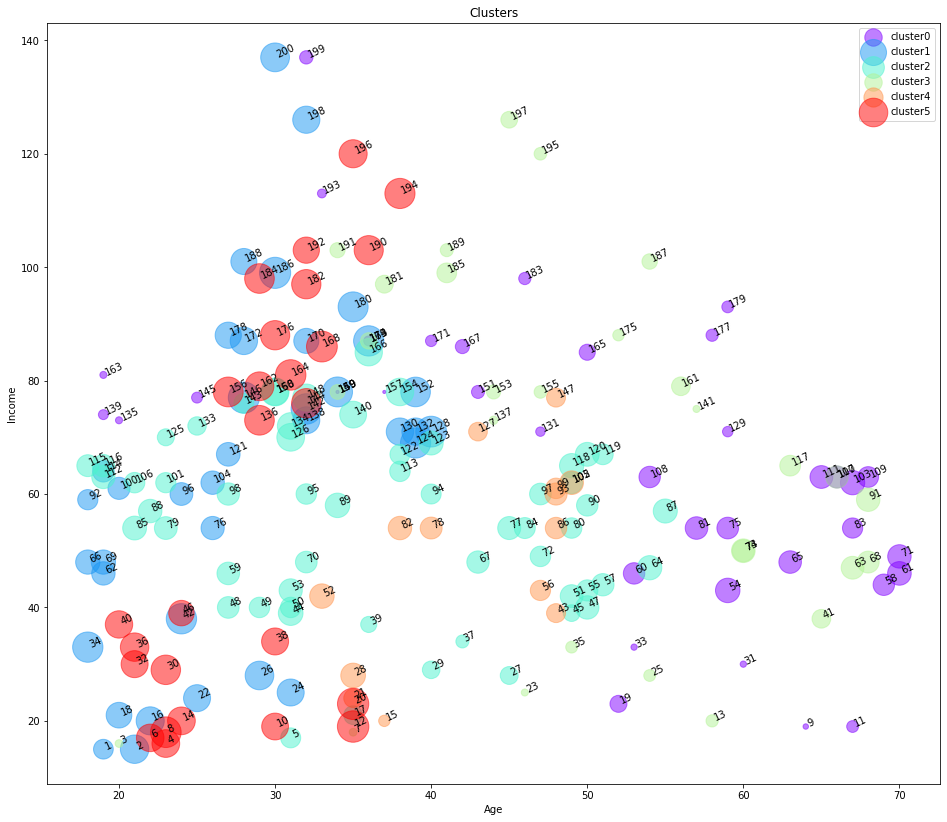

In [65]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(16,14))
for color, label in zip(colors, cluster_labels):
    subset = df[df.cluster_ == label]
    for i in subset.index:
            plt.text(subset.Age[i], subset.Annual_Income[i],subset['CustomerID'][i], rotation=25) 
    plt.scatter(subset.Age, subset.Annual_Income, s= subset.Spending_Score*10, c=color, label='cluster'+str(label),alpha=0.5)
plt.legend()
plt.title('Clusters')
plt.xlabel('Age')
plt.ylabel('Income')

In [66]:
df.groupby(['cluster_','Gender'])['cluster_'].count()

cluster_  Gender
0         1         37
1         1         37
2         0         57
3         0         29
4         1         14
5         0         26
Name: cluster_, dtype: int64

In [73]:
agg_Customers = df.groupby(['cluster_','Gender'])['Age','Annual_Income','Spending_Score',].mean()
agg_Customers

C:\Users\Hanie\AppData\Local\Temp/ipykernel_4540/3705815169.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  agg_Customers = df.groupby(['cluster_','Gender'])['Age','Annual_Income','Spending_Score',].mean()


,,Age,Annual_Income,Spending_Score
cluster_,Gender,,,
0,1,50.864865,65.702703,26.081081
1,1,27.675676,63.675676,72.729730
2,0,36.403509,55.473684,49.701754
3,0,49.931034,67.068966,26.620690
4,1,42.642857,49.214286,43.785714
5,0,28.615385,58.807692,83.307692


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

Text(0, 0.5, 'Income')

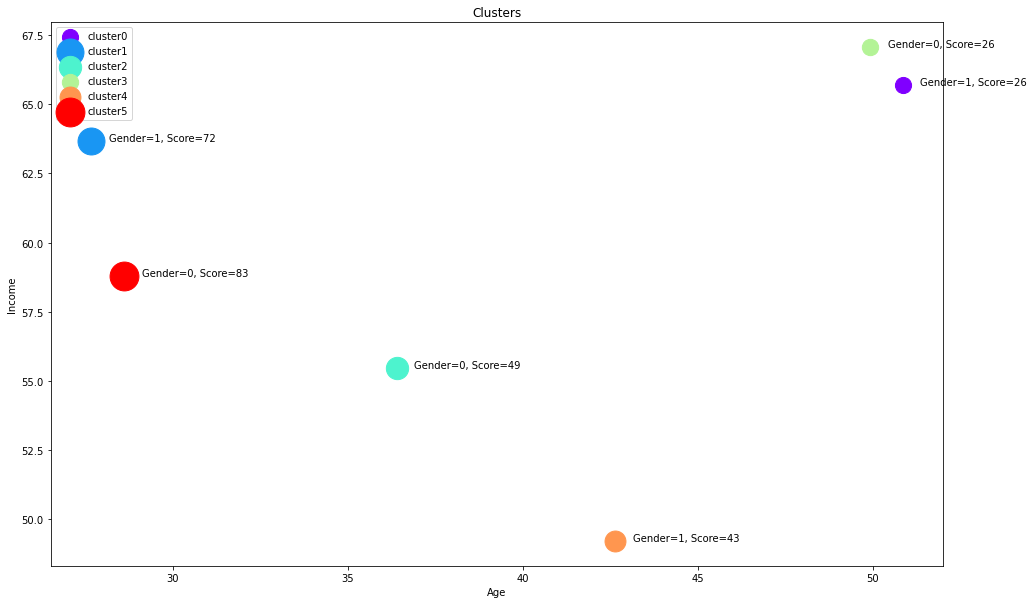

In [82]:
plt.figure(figsize=(16,10))
for color, label in zip(colors, cluster_labels):
    subset = agg_Customers.loc[(label,),]
    for i in subset.index:
        plt.text(subset.loc[i][0]+0.5, subset.loc[i][1], 'Gender='+str(int(i)) + ', Score='+str(int(subset.loc[i][2])))
    plt.scatter(subset.Age, subset.Annual_Income, s=subset.Spending_Score*10, c=color, label='cluster'+str(label))
plt.legend()
plt.title('Clusters')
plt.xlabel('Age')
plt.ylabel('Income')
